## Sampling in Python

Sampling in Python is the cornerstone of inference statistics and hypothesis testing. It's a powerful  
skill used in survey analysis and experimental design to draw conclusions without surveying an entire  
population. 

You will discover when to use sampling and how to perform common types of sampling -- from  
simple random sampling to more complex methods like stratified and cluster sampling. 

Using real-world   datasets, including coffee ratings, Spotify songs, and employee attrition, you'll learn  
to estimate  population statistics and quantify uncertainty in your estimates by generating sampling  
distributions and bootstrap distributions. 

In [57]:
# Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# change the default console output settings in NumPy and pandas to improve readability
pd.options.display.max_columns = 20
pd.options.display.max_rows = 20
pd.options.display.max_colwidth = 80
np.set_printoptions(precision=4, suppress=True)

### Chapter 1: Introduction to Sampling

Learn what sampling is and why it is so powerful. You'll also learn about the problems caused by  
convenience sampling and the difference between true randomness and pseudo-randomness.

#### Sampling and point estimates

##### Sampling households

Cheaper to ask a small number of households and use statistics to estimate the population.

Working with a subset of the whole population is called *sampling*.

##### Population vs. sample

* The *population* is the complete dataset
    * Doesn't have to refer to people
    * We typically don't know what the whole population is

* The sample is the subset of data we are working with

##### Coffee rating dataset

**Note:** An essential library must be installed to work with the feather format. 

* To install: `pip install pyarrow`

In [58]:
# Import coffee ratings
coffee_ratings = pd.read_feather('datasets/coffee_ratings_full.feather')

# Subset DataFrame for columns of interest
coffee_ratings = coffee_ratings[['total_cup_points', 'variety', 'country_of_origin', 'aroma',\
                                 'flavor', 'aftertaste', 'body', 'balance']]

# Preview DataFrame
coffee_ratings.head()

,total_cup_points,variety,country_of_origin,aroma,flavor,aftertaste,body,balance
0,90.58,None,Ethiopia,8.67,8.83,8.67,8.50,8.42
1,89.92,Other,Ethiopia,8.75,8.67,8.50,8.42,8.42
2,89.75,Bourbon,Guatemala,8.42,8.50,8.42,8.33,8.42
3,89.00,None,Ethiopia,8.17,8.58,8.42,8.50,8.25
4,88.83,Other,Ethiopia,8.25,8.50,8.25,8.42,8.33


The dataset of professional ratings of coffees contains 1338 rows. Each row corresponds to one coffee.  
The coffee is given a score from zero to one hundred, which is stored in the total_cup_points column.

Other columns contain contextual information like the variety and country of origin and scores between  
zero and ten for attributes of the coffee such as aroma and body. These scores are averaged across all  
the reviewers for that particular coffee.

It doesn't contain every coffee in the world, so we don't know exactly what the population of coffees is.  
However, there are enough here that we can think of it as our population of interest.

##### Points vs. flavor: population

This dataset contains all 1338 rows from the original dataset.

In [59]:
# Select total_cup_points and flavor columns
pts_vs_flavor_pop = coffee_ratings[['total_cup_points', 'flavor']]

##### Points vs. flavor: 10 row sample

The pandas `.sample()` method returns a random subset of rows. Setting *n=10* means ten random rows are  

returned. By default, rows from the original dataset can't appear in the sample dataset multiple times,  

so we are guaranteed to have ten unique rows in our sample.

In [60]:
# Select a sample of 10 unique rows from the population
pts_vs_flavor_samp = pts_vs_flavor_pop.sample(n=10)

pts_vs_flavor_samp

,total_cup_points,flavor
130,84.67,8.00
1033,80.83,7.25
441,83.17,7.58
1271,76.00,6.83
18,87.25,8.25
653,82.50,7.50
788,82.08,7.42
442,83.17,7.58
360,83.50,7.42
850,81.83,7.50


##### Python sampling for Series

* Use `.sample()` for `pandas` DataFrames and Series

In [61]:
# Example: select a sample of 10 unique rows from total_cup_points
cup_points_samp = pts_vs_flavor_pop['total_cup_points'].sample(n=10)
cup_points_samp

165    84.50
220    84.17
713    82.33
215    84.17
440    83.17
330    83.67
44     86.08
753    82.25
518    83.00
186    84.33
Name: total_cup_points, dtype: float64

##### Population parameters & point estimates

A *population* parameter is a calculation made on the population dataset

In [62]:
# Calculate the population mean of the cup points
np.mean(pts_vs_flavor_pop['total_cup_points'])

82.15120328849028

A *point estimate* or *sample statistic* is a calculation made on the sample dataset.

In [63]:
# Calculate the sample mean of the cup points
np.mean(pts_vs_flavor_samp['total_cup_points'])

82.50000000000001

Notice that the means are very similar but not identical.

##### Point estimates with Pandas

The mean calculations can be performed using the `.mean()` pandas method.

In [64]:
# Calculate the population mean of 'flavor' 
pts_vs_flavor_pop['flavor'].mean()

7.526046337817639

In [65]:
# Calculate the sample mean of 'flavor' 
pts_vs_flavor_samp['flavor'].mean()

7.5329999999999995

#### Convenience sampling

##### Convenience sampling

* A sample not representative of the population causes *sample bias*

* Collecting data by the easiest method is called *convenience sampling*
    * For example, telephoning people
    * It is often prone to *sample bias*

##### Convenience sampling coffee ratings

In [66]:
# Calculate the mean cup points of the population
coffee_ratings['total_cup_points'].mean()

82.15120328849028

In [67]:
# Take the head of the DataFrame as a convenience sample
coffee_ratings_first10 = coffee_ratings.head(10)

# Calculate the mean cup points of the convenience sample
coffee_ratings_first10['total_cup_points'].mean()


89.1

The higher sample mean suggests that coffee with higher cup points appear near the top of the dataset.  

The convenience sample is not representive of the whole population.

##### Visualizing selection bias

Create a histogram of total cup points from the population which contains values ranging from around  
59 to around 91. The `np.arange` function can be used to create bins of width 2 from 59 to 91.

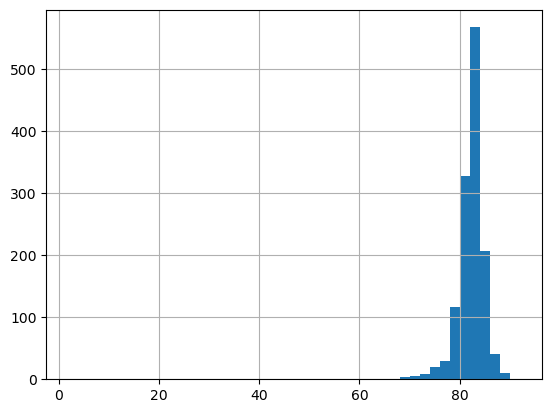

In [68]:
# Create a histogram of total cup points from the population
coffee_ratings['total_cup_points'].hist(bins=np.arange(2, 93, 2))  # specify 93 as stop value is exclusive
plt.show()

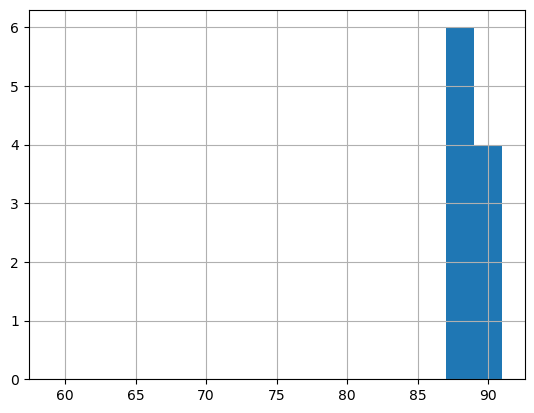

In [69]:
# Create a histogram of total cup points from the convenience sample
coffee_ratings_first10['total_cup_points'].hist(bins=np.arange(59, 93, 2))
plt.show()

##### Distribution of a population and of a convenience sample

The histograms show that the distribution of the sample is not the same as the population: all of the  
sample values are on the right-hand side of the plot.

##### Visualizing selection bias for a random sample

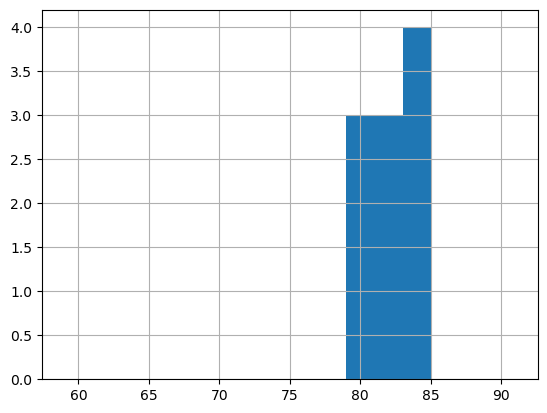

In [70]:
# Take a random sample from coffee ratings
coffee_sample = coffee_ratings.sample(n=10)

# Create a histogram of total cup points from the random sample
coffee_sample['total_cup_points'].hist(bins=np.arange(59, 93, 2))
plt.show()

##### Distribution of a population and of a simple random sample

The shapes of the distributions is more closely aligned when random sampling is used.

#### Pseudo-random number generation

How does a computer do random sampling?

##### What does random mean?

Definition from Oxford Languages:

*{adjective}* made, done, happening, or chosen without method or conscious decision.

##### True random numbers

* Generated from physical processes, like flipping coins

* Hotbits service generates numbers from radioactive decay  
    * https://www.fourmilab.ch/
    
* RANDOM.ORG generates numbers from atmospheric noise (radio signals  
generated by lightning)
    * https://www.random.org

* These processes are fairly slow and expensive for generating  
random numbers

##### Pseudo-random number generation

* This method is cheap and fast

* Each value appears to be 'random' but it is actually  
calculated from the previous 'random' number

* The first 'random' number is calculated from a *seed value*

* The same seed value yields the same random numbers

##### Random number generation functions

<img src="images/screenshot-01.png" width=80%/>

##### Visualizing random numbers

The first argument to each random number function specify distribution parameters. The size argument  
specifies how many numbers to generate. Here, because the numbers were generated from the beta      
distribution, all the values are between zero and one.


In [71]:
# Generate random numbers using the beta distribution
randoms = np.random.beta(a=2, b=2, size=5000)
randoms

array([0.2625, 0.6218, 0.366 , ..., 0.4428, 0.5933, 0.3542])

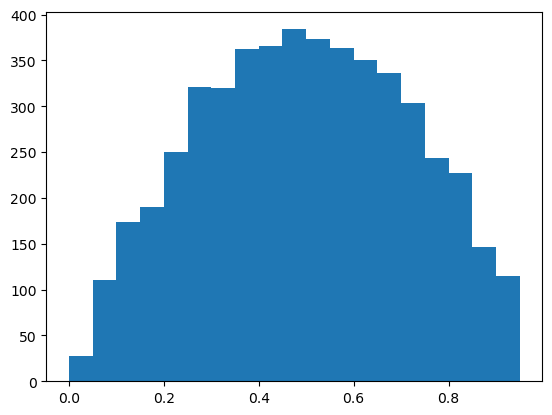

In [72]:
# Plot histogram
plt.hist(randoms, bins=np.arange(0, 1, 0.05))
plt.show()

##### Random numbers seeds

The NumPy `random.seed()` method takes an integer for the seed number.  

`.normal()` generates pseudo-random numbers from the normal distribution. The `loc`  
and `scale` arguments set the mean and standard deviation of the distribution, and   
the `size` argument determines how many random numbers from that distribution will  
be returned.

The numbers are reproducible if the same seed is used.

In [73]:
# Set the seed
np.random.seed(20000229)

# Generate 'random' numbers from the normal distribution
np.random.normal(loc=2, scale=1.5, size=2)

array([-0.5903,  1.8782])

### Chapter 2: Sampling Methods

#### Simple random and systematic sampling

##### Simple random sampling of coffees

In our coffee ratings dataset, the population consists of coffee varieties. To perform simple random  
sampling, we take some at random, one at a time.

Each coffee has the same chance as any other of being picked.

##### Simple random sampling with pandas

We call `.sample()` and set `n` to the size of the sample. We can also set the seed using the   
`random_state` argument to generate reproducible results.

In [74]:
# Create a simple random sample
coffee_ratings.sample(n=5, random_state=19000113)

,total_cup_points,variety,country_of_origin,aroma,flavor,aftertaste,body,balance
437,83.25,None,Colombia,7.92,7.75,7.25,7.83,7.58
285,83.83,Yellow Bourbon,Brazil,7.92,7.50,7.33,8.17,7.50
784,82.08,None,Colombia,7.50,7.42,7.42,7.67,7.42
648,82.58,Caturra,Colombia,7.58,7.50,7.42,7.67,7.42
155,84.58,Caturra,Colombia,7.42,7.67,7.75,8.08,7.83


##### Systematic sampling

This samples the population at regular intervals. Here, looking from top to bottom and left to right  
within each row, every fifth coffee is sampled.

<img src="images/screenshot-02.png" width=80%/>

##### Systematic sampling -defining the interval

In [75]:
# Set the sample size
sample_size = 5

# Find the number of rows in the dataset
pop_size = len(coffee_ratings) 
print(pop_size)

1338


In [76]:
# Set the interval
interval = pop_size // sample_size  # integer division with // discards any fractional part
print(interval)

267


Thus, to get a systematic sample of five coffees, we will select every 267th coffee in the dataset.

##### Systematic sampling - selecting the rows

In [77]:
# The double-colon tells pandas to select every 267th row 
# from zero to the end of the DataFrame
coffee_ratings.iloc[::interval]  

,total_cup_points,variety,country_of_origin,aroma,flavor,aftertaste,body,balance
0,90.58,None,Ethiopia,8.67,8.83,8.67,8.50,8.42
267,83.92,None,Colombia,7.83,7.75,7.58,7.75,7.75
534,82.92,Bourbon,El Salvador,7.50,7.50,7.75,7.92,7.83
801,82.00,Typica,Taiwan,7.33,7.50,7.17,7.50,7.33
1068,80.50,Other,Taiwan,7.17,7.17,7.17,7.17,7.25
1335,77.17,None,United States,7.33,7.33,7.17,7.50,7.17


##### The trouble with systematic sampling

To examine statistics about the aftertaste attribute of the coffees:

In [78]:
# First create a column of index values that we can plot
coffee_ratings_with_id = coffee_ratings.reset_index()
coffee_ratings_with_id.head()

,index,total_cup_points,variety,country_of_origin,aroma,flavor,aftertaste,body,balance
0,0,90.58,None,Ethiopia,8.67,8.83,8.67,8.50,8.42
1,1,89.92,Other,Ethiopia,8.75,8.67,8.50,8.42,8.42
2,2,89.75,Bourbon,Guatemala,8.42,8.50,8.42,8.33,8.42
3,3,89.00,None,Ethiopia,8.17,8.58,8.42,8.50,8.25
4,4,88.83,Other,Ethiopia,8.25,8.50,8.25,8.42,8.33


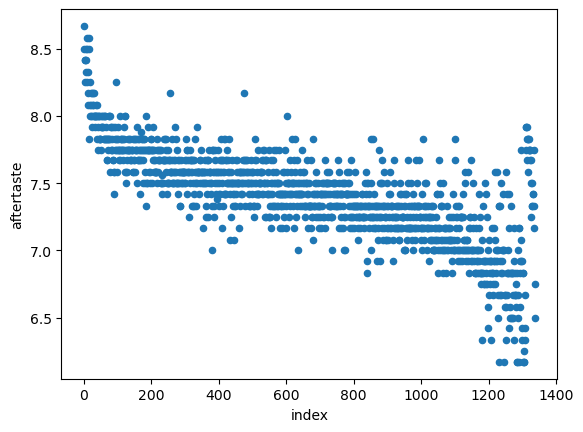

In [79]:
# Create a scatter plot 
coffee_ratings_with_id.plot(x='index', y='aftertaste', kind='scatter')
plt.show()

Plotting aftertaste against index shows a pattern. Earlier rows generally have higher aftertaste scores  
than later rows. This introduces bias into the statistics that we calculate.  

In general, it is only safe to use systematic sampling if a plot like this has no pattern; that is, it  
just looks like noise.

##### Making systematic sampling safe

To ensure that systematic sampling is safe, we can randomize the row order before sampling. The `frac`  
argument lets us specify the proportion of the dataset to return in the sample, rather than the absolute  
number of rows that `n` specifies.

Setting `frac=1` randomly samples the whole dataset. In effect, this randomly shuffles the rows.

Next, the indices need to be reset so that they go in order from zero again. Specifying `drop=True`  
clears the previous row indices, and chaining to another `reset_index` call creates a column containing  
these new indexes.

In [80]:
# Randomly shuffle the rows in the dataset
shuffled = coffee_ratings.sample(frac=1)

# Create a new index column
shuffled = shuffled.reset_index(drop=True).reset_index()
shuffled.head()

,index,total_cup_points,variety,country_of_origin,aroma,flavor,aftertaste,body,balance
0,0,84.25,Caturra,Colombia,7.83,7.58,7.75,7.67,8.00
1,1,84.17,Bourbon,El Salvador,8.42,8.08,7.50,7.58,8.17
2,2,84.58,Bourbon,Brazil,8.00,8.00,7.75,7.58,7.75
3,3,82.75,Typica,Colombia,7.67,7.42,7.42,7.33,7.67
4,4,85.00,None,Kenya,8.17,7.83,7.92,7.67,7.83


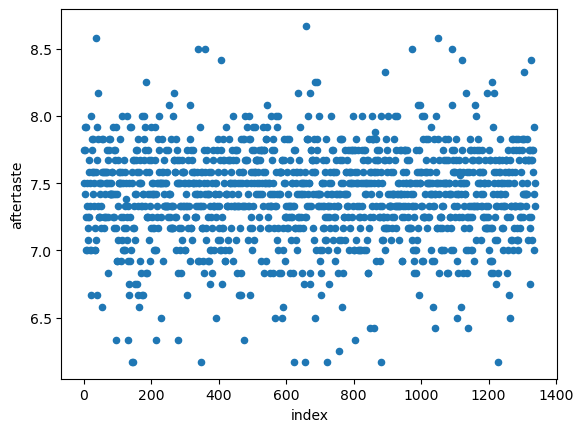

In [81]:
# Redraw the plot with the shuffled dataset
shuffled.plot(x='index', y='aftertaste', kind='scatter')
plt.show()

There is now no pattern between aftertaste and index.  

**Note:** Shuffling rows + systematic sampling is the same as simple random sampling.

#### Stratified and weighted random sampling

Stratified sampling is a technique that allows us to sample a population that contains subgroups.

##### Coffees by country

For example, we could group the coffee ratings by country.
  
Six countries have the most data.

In [82]:
# Group coffee_ratings by country
top_counts = coffee_ratings['country_of_origin'].value_counts()
top_counts.head(6)

country_of_origin
Mexico                    236
Colombia                  183
Guatemala                 181
Brazil                    132
Taiwan                     75
United States (Hawaii)     73
Name: count, dtype: int64

##### Filter for 6 countries

To make it easier to think about sampling subgroups, we limit our analysis to these six countries.

The filtered dataset is stored as coffee_ratings_top

In [83]:
# Create a list of the six countries
top_counted_countries = [
    'Mexico', 'Colombia', 'Guatemala', 'Brazil',
    'Taiwan', 'United States (Hawaii)'
]

# Filter coffee_ratings for the list of countries
top_counted_subset = coffee_ratings['country_of_origin'].isin(top_counted_countries)
coffee_ratings_top = coffee_ratings[top_counted_subset]
coffee_ratings_top.head()

,total_cup_points,variety,country_of_origin,aroma,flavor,aftertaste,body,balance
2,89.75,Bourbon,Guatemala,8.42,8.50,8.42,8.33,8.42
5,88.83,None,Brazil,8.58,8.42,8.42,8.25,8.33
13,87.92,None,United States (Hawaii),8.33,8.42,8.08,8.25,8.00
22,87.17,Other,Mexico,8.17,8.25,8.17,7.83,8.17
25,86.92,Bourbon,Brazil,8.50,8.50,8.00,8.00,8.00


##### Counts of a simple random sample

In [84]:
# Take a 10% simple random sample of the dataset
coffee_ratings_samp = coffee_ratings_top.sample(frac=0.1, random_state=2021)

# Look at the proportion of counts from each country by setting 
# normalize=True
coffee_ratings_samp['country_of_origin'].value_counts(normalize=True)

country_of_origin
Mexico                    0.250000
Guatemala                 0.204545
Colombia                  0.181818
Brazil                    0.181818
United States (Hawaii)    0.102273
Taiwan                    0.079545
Name: proportion, dtype: float64

##### Comparing proportions

In this sample, Taiwanese coffees form a disproportionately low percentage. The different makeup of the  
sample compared to the population could be a problem if we want to analyze the country of origin,  
for example.

<img src="images/screenshot-03.png" width=80%/>

##### Proportional stratified sampling

For the proportion of each country in the sample to closely match those in the population, group the data  
by country before taking the simple random sample.

Calling the `.sample()` method after grouping takes a simple random sample within each country.

In [85]:
# Croup by country before taking a simple random sample
coffee_ratings_strat = coffee_ratings_top.groupby('country_of_origin')\
    .sample(frac=0.1, random_state=2021)

# Look at the proportion of counts from each country
coffee_ratings_strat['country_of_origin'].value_counts(normalize=True)

country_of_origin
Mexico                    0.272727
Colombia                  0.204545
Guatemala                 0.204545
Brazil                    0.147727
Taiwan                    0.090909
United States (Hawaii)    0.079545
Name: proportion, dtype: float64

##### Equal counts stratified sampling

One variation of stratified sampling is to sample equal counts from each group, rather than an equal  
proportion. The resulting sample has equal proportions of one-sixth from each country.

In [86]:
# Extract 15 randomly selected rows from each country
coffee_ratings_eq = coffee_ratings_top.groupby('country_of_origin')\
    .sample(n=15, random_state=2021)

# Look at the proportion of counts from each country
coffee_ratings_eq['country_of_origin'].value_counts(normalize=True)

country_of_origin
Brazil                    0.166667
Colombia                  0.166667
Guatemala                 0.166667
Mexico                    0.166667
Taiwan                    0.166667
United States (Hawaii)    0.166667
Name: proportion, dtype: float64

##### Weighted random sampling

In this variant, we create a column of weights that adjusts the relative probability of sampling each row.

For example, to have a higher proportion of Taiwanese coffees in the sample than in the population,  
we first create a condition.

Next, using the `np.where()` function, set a weight of two for rows that match the condition and a 
weight of one for rows that don't match the condition. This means Taiwanese coffees have two times the  
chance of being picked.

In [87]:
# Condition to select rows where country_of_origin is Taiwan
import numpy as np
coffee_ratings_weight = coffee_ratings_top.copy()  # make a copy
condition = coffee_ratings_weight['country_of_origin'] == 'Taiwan'

# Add a weight column to the dataframe
coffee_ratings_weight['weight'] = np.where(condition, 2, 1)

# Sample the dataframe passing the weights argument
coffee_ratings_weight = coffee_ratings_weight.sample(frac=0.1, weights='weight')

##### Weighted random sampling results

In [88]:
coffee_ratings_weight['country_of_origin'].value_counts(normalize=True)

country_of_origin
Mexico                    0.250000
United States (Hawaii)    0.204545
Colombia                  0.193182
Guatemala                 0.159091
Taiwan                    0.102273
Brazil                    0.090909
Name: proportion, dtype: float64

#### Cluster sampling

One problem with stratified sampling is that we need to collect data from every subgroup. In cases where collecting  
data is expensive, a cheaper alternative is cluster sampling.

##### Stratified sampling vs. cluster sampling

**Stratified sampling**
* Split the population into subgroups
* Use simple random sampling on every subgroup

**Cluster sampling**
* It is a two stage sampling technique
    * Stage 1: Use simple random sampling to pick some subgroups
    * Stage 2: Use simple random sampling on only those subgroups

##### Varieties of coffee

Suppose it is expensive to work with all 28 varieties of coffee in the dataset.

In [89]:
# Extract a list of unique varieties of coffee from the dataset
varieties_pop = list(coffee_ratings['variety'].unique())

##### Stage 1: sampling for subgroups

In [90]:
# Randomly select 3 varieties of coffee
""" Do not run this code again so that varieties_samp, will not change
as it affects subsequent computations:

import random
varieties_samp = random.sample(varieties_pop, k=3)
varieties_samp

"""
# Hardcode the coffee samples
varieties_samp = ['Caturra', 'Bourbon', 'Typica']

##### Stage 2: sample each group

Perform simple random sampling on each of the three varieties that was randomly selected.

In [91]:
# Filter the dataset for rows with the selected varieties
variety_condition = coffee_ratings['variety'].isin(varieties_samp)
coffee_ratings_cluster = coffee_ratings[variety_condition]
coffee_ratings_cluster['variety'].value_counts()

variety
Caturra    255
Bourbon    226
Typica     211
Name: count, dtype: int64

In [92]:
# Execute equal counts sampling, with five rows from each remaining variety
coffee_ratings_cluster.groupby('variety').sample(n=5, random_state=2021)

,total_cup_points,variety,country_of_origin,aroma,flavor,aftertaste,body,balance
575,82.83,Bourbon,Guatemala,7.67,7.67,7.33,7.33,7.92
560,82.83,Bourbon,Guatemala,7.50,7.58,7.33,7.58,7.58
524,83.00,Bourbon,Guatemala,7.50,7.67,7.50,7.50,7.83
1140,79.83,Bourbon,Guatemala,7.33,7.25,6.92,7.25,7.33
318,83.67,Bourbon,Brazil,7.58,7.75,7.58,7.58,7.58
773,82.17,Caturra,Guatemala,7.25,7.75,7.00,8.17,7.75
151,84.58,Caturra,Colombia,7.75,7.75,7.83,7.58,8.00
459,83.17,Caturra,Honduras,7.67,7.67,7.50,7.50,7.67
525,83.00,Caturra,Colombia,7.67,7.67,7.58,7.67,7.42
655,82.50,Caturra,Honduras,7.58,7.58,7.33,7.50,7.50


##### Multistage sampling

* Cluster sampling is a special case of multistage sampling
* Multistage sampling can have more than 2 stages
* For example, countrywide surveys may sample states, counties, cities  
and neighborhoods

#### Comparing sampling methods

##### Review of sampling techniques - setup

We will stick to the six countries with the most coffee varieties that we used before.

In [93]:
top_counted_countries = ['Mexico', 'Colombia', 'Guatemala',
                         'Brazil', 'Taiwan', 'United States (Hawaii)']

subset_condition = coffee_ratings['country_of_origin'].isin(top_counted_countries)
coffee_ratings_top = coffee_ratings[subset_condition]

# Preview the shape of the dataframe
coffee_ratings_top.shape

(880, 8)

##### Review of simple random sampling

In [94]:
# Return a simple random sample
coffee_ratings_srs = coffee_ratings_top.sample(frac=1/3, random_state=2021)

# Preview the shape of the sample
coffee_ratings_srs.shape

(293, 8)

##### Review of stratified sampling

In [95]:
# Return a stratified sample
coffee_ratings_strat = coffee_ratings_top.groupby('country_of_origin')\
    .sample(frac=1/3, random_state=2021)

# Preview the shape of the sample
coffee_ratings_strat.shape

(293, 8)

##### Review of cluster sampling

In the cluster sample, we use two out of six countries to roughly mimic `frac=1/3` from the other sample types.  
Setting `n=1/6` of the total number of rows gives roughly equal sample sizes in each of the two subgroups.

In [96]:
import random
random.seed(2026)

# Sample 2 out of the 6 countries in the list
top_countries_samp = random.sample(top_counted_countries, k=2)

# Filter dataframe for rows with the 2 selected country_of_origin
top_condition = coffee_ratings_top['country_of_origin'].isin(top_countries_samp)
coffee_ratings_cluster = coffee_ratings_top[top_condition]

# Return a cluster sample
coffee_ratings_clust = coffee_ratings_cluster.groupby('country_of_origin')\
    .sample(n=len(coffee_ratings_top) // 6)

# Preview the shape of the sample
coffee_ratings_clust.shape

(292, 8)

##### Calculating mean cup points

In [97]:
# Calculate the population mean of total cup points
pop_mean = coffee_ratings_top['total_cup_points'].mean()

# Calculate the sample means
srs_mean = coffee_ratings_srs['total_cup_points'].mean()
strat_mean = coffee_ratings_strat['total_cup_points'].mean()
clust_mean = coffee_ratings_clust['total_cup_points'].mean()

print(pop_mean, srs_mean, strat_mean, clust_mean)

81.94700000000002 81.91331058020478 81.92566552901025 81.26787671232877


The simple and stratified means are really close to the population mean. Cluster sampling isn't as close, but that's  
typical. Cluster sampling is designed to give an answer that's almost as good while using less data.

##### Mean cup points by country

In [98]:
# Calculate the population mean of total cup points by country
coffee_ratings_top.groupby('country_of_origin')\
    ['total_cup_points'].mean()

country_of_origin
Brazil                    82.405909
Colombia                  83.106557
Guatemala                 81.846575
Mexico                    80.890085
Taiwan                    82.001333
United States (Hawaii)    81.820411
Name: total_cup_points, dtype: float64

In [99]:
# Calculate the sample means by country using the simple random sample
coffee_ratings_srs.groupby('country_of_origin')\
    ['total_cup_points'].mean()


country_of_origin
Brazil                    82.251875
Colombia                  82.961014
Guatemala                 81.392917
Mexico                    81.152000
Taiwan                    81.957391
United States (Hawaii)    81.766400
Name: total_cup_points, dtype: float64

In [100]:
# Calculate the sample means by country using the stratified sample
coffee_ratings_strat.groupby('country_of_origin')\
    ['total_cup_points'].mean()

country_of_origin
Brazil                    82.499773
Colombia                  83.288197
Guatemala                 81.727667
Mexico                    80.994684
Taiwan                    81.846800
United States (Hawaii)    81.051667
Name: total_cup_points, dtype: float64

In [101]:
# Calculate the sample means by country using the cluster sample
coffee_ratings_clust.groupby('country_of_origin')\
    ['total_cup_points'].mean()

country_of_origin
Guatemala    81.797808
Mexico       80.737945
Name: total_cup_points, dtype: float64

The sample means in each case case are close to the population means. The limitation with cluster sampling it that  
we only get the values for the two countries in the sample. If the mean cup points for each country is an important  
metric in our analysis, cluster sampling would not be appropriate.

### Chapter 3: Sampling Distributions

Discover how to quantify the accuracy of sample statistics using relative errors, and measure variations in your  
estimates by generating sampling distributions.

#### Relative error of point estimates

How does the size of the sample affect the accuracy of the point estimates we calculate.

##### Sample size is the number of rows

In [102]:
len(coffee_ratings.sample(n=300))

300

In [103]:
len(coffee_ratings.sample(frac=0.25))

334

##### Various sample sizes

In [104]:
# Calculate the population mean of total_cup_points
coffee_ratings['total_cup_points'].mean()

82.15120328849028

In [105]:
# Calculate the sample mean of 10 rows
coffee_ratings.sample(n=10)['total_cup_points'].mean()

81.2

In [106]:
# Calculate the sample mean of 100 rows
coffee_ratings.sample(n=100)['total_cup_points'].mean()

82.32539999999999

In [107]:
# Calculate the sample mean of 1000 rows
coffee_ratings.sample(n=1000)['total_cup_points'].mean()

82.16815

In general, larger sample sizes will return more accurate results.

##### Relative errors

The most common metric for assessing the difference between the population and a sample mean is the   
`relative error`.

The relative error is the absolute difference between the two means, divided by the population mean.

`relative_error = abs(population_mean - sample_mean) / population_mean`

##### Relative error vs. sample size

The line plot of relative error versus sample size shows that the relative error decreases as the sample size  
increases.

<img src="images/screenshot-04.png" width=80%/>

#### Creating a sampling distribution

##### Same code, different answer

This same code to calculate the mean cup points from a simple random sample of thirty coffees will give a slightly  
different answer each time.

In [108]:
# Calculate the sample mean
coffee_ratings.sample(n=30)['total_cup_points'].mean()

82.28933333333335

##### Same code, 1000 times

Set up a for loop to repeatedly sample 30 coffees from coffee_ratings a total of 1000 times. After each  
calculation, the result, also called a replicate, is appended to a list.

In [109]:
# Initialize an empty list to store the results
mean_cup_points_1000 = []

for i in range(1000):
    mean_cup_points_1000.append(
        coffee_ratings.sample(n=30)['total_cup_points'].mean()
    )

# Preview the list
print(mean_cup_points_1000[:5])

[82.47266666666665, 82.48400000000001, 82.55566666666667, 81.17166666666667, 81.778]


##### Distribution of sample means for size 30

The one thousand sample means form a distribution of sample means, also called a sampling distribution.

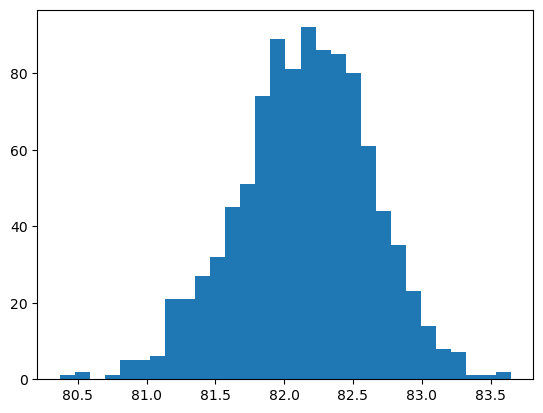

In [110]:
# Visualize the sampling distribution with a histogram
plt.hist(mean_cup_points_1000, bins=30)
plt.show()

Most of the results lie between 81 and 83 and the distribution follows a bell-shaped curve, like the   
normal distribution.

Bigger sample sizes give us more accurate results. As shown, by replicating the sampling many times,  
we can quantify that accuracy.

#### Approximate sampling distributions

##### 4 dice

To generate all possible combinations of rolling four six-sided dice:

In [111]:
import pandas as pd
from itertools import product

# Define the values for each die
die_values = [1,2,3,4,5,6]

# Generate all possible combinations using itertools.product
combinations = list(product(die_values, repeat=4))

# Create a DataFrame with the combinations
dice = pd.DataFrame(combinations, columns=['die1', 'die2', 'die3', 'die4'])
dice.head()

,die1,die2,die3,die4
0,1,1,1,1
1,1,1,1,2
2,1,1,1,3
3,1,1,1,4
4,1,1,1,5


##### Mean roll

Add a column called mean_roll with the mean of the four rolls. mean_roll ranges from 1, when four ones are rolled,  
to 6, when four sixes are rolled.

In [112]:
dice['mean_roll'] = (
    dice['die1'] +
    dice['die2'] +
    dice['die3'] +
    dice['die4']
) / 4

dice.head()

,die1,die2,die3,die4,mean_roll
0,1,1,1,1,1.00
1,1,1,1,2,1.25
2,1,1,1,3,1.50
3,1,1,1,4,1.75
4,1,1,1,5,2.00


##### Exact sampling distribution

Since the mean roll takes discrete values instead of continuous values, the best way to see the distribution of  
mean_roll is to draw a bar plot.

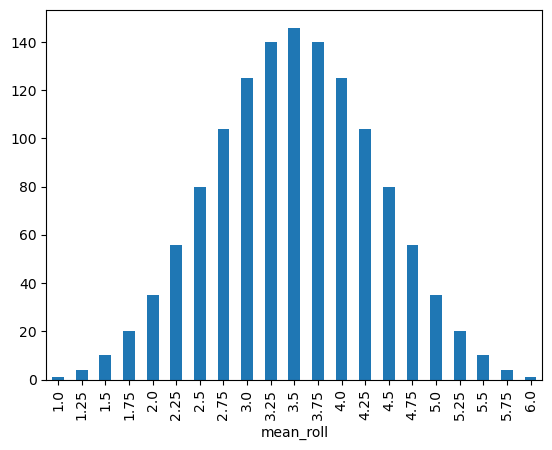

In [113]:
# Convert mean_roll to categorical
dice['mean_roll'] = dice['mean_roll'].astype('category')

# Plot the counts of each value
# sort=False ensures the x-axis ranges from 1 to 6 instead
# of sorting the bars by frequency
dice['mean_roll'].value_counts(sort=False).plot(kind='bar')
plt.show()

This is the exact sampling distribution of the mean roll because it contains every single combination of die rolls.

##### The number of outcomes increases fast

If we increase the number of dice in our scenario, the number of possible outcomes increases by a factor of six  
each time. With just one hundred dice, the number of outcomes is about the same as the number of atoms in the  
universe. 

It is therefore computationally impossible to calculate the exact sampling distribution and we need to rely on  
approximations.

In [114]:
n_dice = list(range(1, 101))

n_outcomes = []

for n in n_dice:
    n_outcomes.append(6**n)

outcomes = pd.DataFrame(
    {'n_dice': n_dice,
     'n_outcomes': n_outcomes}
)

outcomes.head()

,n_dice,n_outcomes
0,1,6
1,2,36
2,3,216
3,4,1296
4,5,7776


##### Simulating the mean of four dice rolls

Generate a sample mean of four dice rolls using NumPy's `random.choice()` method, specifying `size=4`.

In [115]:
import numpy as np

np.random.choice(list(range(1,7)), size=4, replace=True).mean()

4.0

Then use a for loop to generate lots of sample means:

In [116]:
# Initialize an empty list
sample_means_1000 = []

# Create a for loop to generate 1000 simulated sample means
for i in range(1000):
    sample_means_1000.append(
        np.random.choice(list(range(1,7)), size=4, replace=True).mean()
    )

print(sample_means_1000[:5])

[2.25, 3.75, 3.5, 3.75, 4.5]


##### Approximate sampling distribution

The histogram of approximate sampling distribution of mean rolls, uses simulated rather than the exact values.  
Usually, we don't have access to the whole population, so we can't calculate the exact sampling distribution.  

However, we can feel relatively confident that using an approximation will provide a good guess as to how the  
sampling distribution will behave.

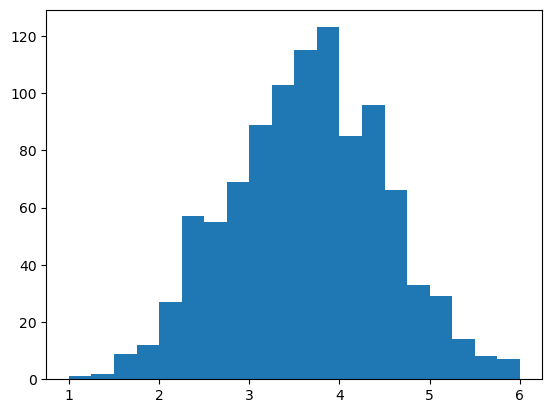

In [117]:
plt.hist(sample_means_1000, bins=20)
plt.show()

#### Standard errors and the Central Limit Theorem

The Gaussian distribution (also known as the normal distribution) plays an important role in statistics.

##### Sampling distribution of mean cup points

Each histogram shows five thousand replicates, with different sample sizes in each case. Increasing the sample  
size results in greater accuracy in our estimates of the population parameter, so the width of the distribution  
shrinks as the sample size increases.

As the sample size increases, the shape of the curve gets closer and closer to being a normal distribution.

<img src="images/screenshot-05.png" width=80%/>

##### The central limit theorem

> Averages of independent samples have approximately **normal distributions**.

As the sample size increases, 
* The distribution of the averages gets *closer to being normally distributed*
* The width of the sampling distribution gets *narrower*

##### Population & sampling distribution means

For each of our four sampling distributions, if we take the mean of our sample means, we can see that we get  
values that are very close to the population parameter that the sampling distributions are trying to estimate.

<img src="images/screenshot-06.png" width=80%/>

##### Population & sampling distribution standard deviations

The standard deviations of the sample means from each of the sampling distributions, are much smaller than the  
population standard deviation, and the standard deviations decrease as the sample size increases.

So what are these smaller standard deviation values?

<img src="images/screenshot-07.png" width=80%/>

##### Population mean over square root sample size

Another consequence of the central limit theorem is that if we divide the population standard deviation by the   
square root of the sample size, we get an estimate of the standard deviation of the sampling distribution for  
that sample size.

It isn't exact because of the randomness involved in the sampling process.

<img src="images/screenshot-08.png" width=80%/>

##### Standard error

This standard deviation of the sampling distribution has a special name: the *standard error*.

It is useful in a variety of contexts, from estimating population standard deviation to setting expectations  
on what level of variablity we would expect from the sampling process.

### Chapter 4: Bootstrap Distributions

Deal with resampling to perform bootstrapping and estimate variation in an unknown population.

Learn the difference between sampling distributions and bootstrap distributions using resampling.

#### Introduction to bootstrapping

Sampling with replacement is sometimes called resampling.

##### Why sample with replacement?

The coffee_ratings dataset does not include every coffee in the world. To imagine what the whole population is  
like, we need to approximate the other coffees that aren't in the dataset.  

Each of the coffees in the sample dataset will have properties that are representative of the coffees that we  
don't have. Resampling lets us use the existing coffees to approximate those other theoretical coffees.

##### Coffee data preparation

In [118]:
# Simplify analysis by focusing on three columns
coffee_focus = coffee_ratings[['variety', 'country_of_origin', 'flavor']]
coffee_focus.head()

,variety,country_of_origin,flavor
0,None,Ethiopia,8.83
1,Other,Ethiopia,8.67
2,Bourbon,Guatemala,8.50
3,None,Ethiopia,8.58
4,Other,Ethiopia,8.50


In [119]:
# To make it easier to see which rows end up in the sample
# Call reset_index to add an index column
coffee_focus = coffee_focus.reset_index()
coffee_focus.head()

,index,variety,country_of_origin,flavor
0,0,None,Ethiopia,8.83
1,1,Other,Ethiopia,8.67
2,2,Bourbon,Guatemala,8.50
3,3,None,Ethiopia,8.58
4,4,Other,Ethiopia,8.50


##### Resampling with .sample()

In [120]:
# Setting frac=1 produces a sample of the same size as the original dataset
coffee_resamp = coffee_focus.sample(frac=1, replace=True)

##### Repeated coffees

Counting the values of the index column shows how many times each coffee ended up in the resampled dataset.

In [121]:
# Count the values of the index column
coffee_resamp['index'].value_counts()

index
876     5
497     5
1066    5
626     4
1315    4
       ..
1194    1
517     1
852     1
107     1
1145    1
Name: count, Length: 842, dtype: int64

##### Missing coffees

Since some coffees were sampled four or five times, it means that some coffees did not end up in the resample.

In [122]:
# Number of unique coffees in the resample 
num_unique_coffees = len(coffee_resamp.drop_duplicates(subset='index'))
print(num_unique_coffees)

842


In [123]:
# Number of coffees not included in the resample
len(coffee_ratings) - num_unique_coffees

496

##### Bootstrapping

> The opposite of sampling from a population

*Sampling*: treats a dataset as the population  
from which to generate a random subset

*Bootstrapping*: treats a dataset as a sample  
and uses it to build up a theoretical population

A use case of bootstrapping is to try to understand the variability due to sampling.  
This is important in cases where we aren't able to sample the population multiple times  
to create a sampling distribution.

##### Bootstraping process

Follow the three steps of the bootstrapping process to get a  
bootstrap distribution:

1. Randomly sample with replacement to get a resample the same size  
as the original dataset

2. Calculate a statistic, such as a mean of one of the columns  
**Note:** Bootstrapping also allows for other statistics to be computed

3. Repeat steps 1 and 2 many times to get lots of these bootstrap statistics

##### Bootstrapping coffee mean flavor

In [124]:
import numpy as np

# Initialize an empty list
mean_flavors_1000 = []

# Repeat steps 1 and 2 one thousand times
for i in range(1000):
    mean_flavors_1000.append(
        np.mean(coffee_focus.sample(frac=1, replace=True)['flavor'])
    )

##### Bootstrap distribution histogram

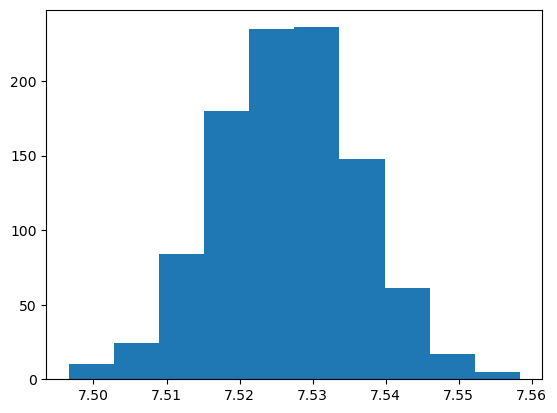

In [125]:
# Plot a histogram
plt.hist(mean_flavors_1000)
plt.show()

#### Comparing sampling and bootstrap distributions

##### Sample, bootstrap distribution, population means

<img src="images/screenshot-09.png" width=80%/>

##### Interpreting the means

In the bootstrap distribution, each value is an estimate of the mean flavor score, and corresponds to one  
potential sample mean from the theoretical population. The mean of those means, `7.5133...`, is our best   
guess of the population mean. However, this is still different from the true population mean of `7.5260...`

Bootstrap distribution mean:
* Usually close to the sample mean
* May not be a good estimate of the population mean

**Bootstrapping cannot correct any potential biases from sampling** due to  
differences between the sample and the population.

##### Sample, bootstrap distribution, population standard deviations

<img src="images/screenshot-10.png" width=80%/>

One goal of bootstrapping is to quantify what variability we might expect in our sample statistic as we go from  
one sample to another. This quantity is called the *standard error* as measured by the standard deviation of  
the sampling distribution of that statistic

The product of the standard error and the square root of the sample size returns the estimated population  
standard deviation.

Although bootstrapping is poor at estimating the population mean, it is generally great for estimating the  
population standard deviation.

#### Confidence intervals

One way to quantify the sampling distribution and the bootstrap distribution is the idea of "values within one  
standard deviation of the mean", which gives a good sense of where most of the values in a distribution lie.

##### Our weather prediction

* Point estimate = 8.3<sup>o</sup>C
* Since the weather is variable:
    * Range of plausible high temperature values = 4.4 to 12.8<sup>o</sup>C
* The prediction of 4.4 to 12.8<sup>o</sup>C is a *confidence interval*
* Sometimes written as 8.3<sup>o</sup>C (4.4<sup>o</sup>C, 12.8<sup>o</sup>C) or 8.3<sup>o</sup>C [4.4<sup>o</sup>C, 12.8<sup>o</sup>C]

##### Bootstrap distribution of mean flavor

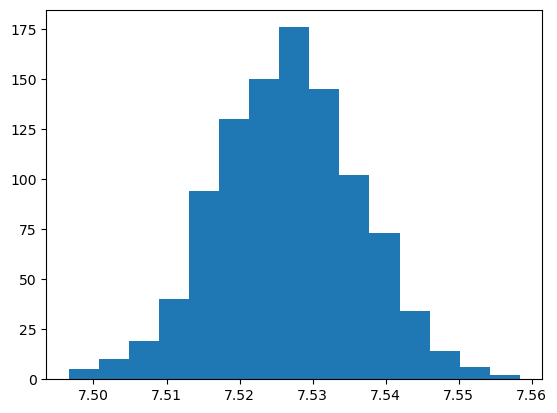

In [126]:
# Bootstrap distribution of the mean flavor from the coffee dataset
plt.hist(mean_flavors_1000, bins=15)
plt.show()

##### Mean plus or minus one standard deviation

In [127]:
# Mean of the bootstrap distribution of the mean flavor
mean_value = np.mean(mean_flavors_1000)

In [128]:
# Subtract one standard deviation from the mean
lower_bound = np.mean(mean_flavors_1000) - np.std(mean_flavors_1000, ddof=1)

In [129]:
# Add one standard deviation to the mean
upper_bound = np.mean(mean_flavors_1000) + np.std(mean_flavors_1000, ddof=1)

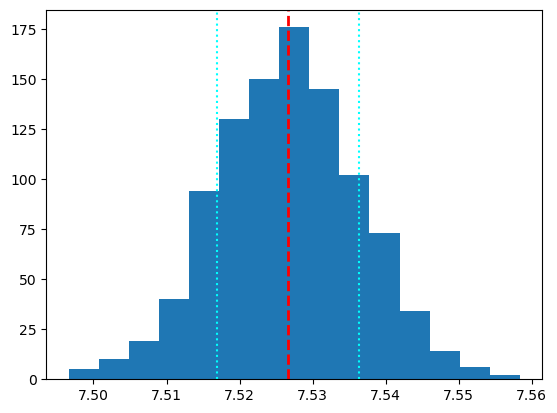

In [130]:
# Plot a histogram showing the mean and std deviations
plt.hist(mean_flavors_1000, bins=15)
plt.axvline(mean_value, color='red', linestyle='dashed', linewidth=2)
plt.axvline(lower_bound, color='cyan', linestyle='dotted')
plt.axvline(upper_bound, color='cyan', linestyle='dotted')

plt.show()

We see that there are lots of values in the bootstrap distribution outside of the one standard deviation  
confidence interval.

##### Quantile method for confidence intervals

To include 95% of the values in the confidence interval, we can use quantiles

In [131]:
# Calculate the lower bound of the 95% confidence interval
np.quantile(mean_flavors_1000, 0.025)

7.50814630044843

In [132]:
# Calculate the upper bound of the 95% confidence interval
np.quantile(mean_flavors_1000, 0.975)

7.545651158445441

##### Inverse cumulative distribution function

To understand this method to calculate confidence intervals, we need to be familiar with the normal  
distribution's inverse cumulative distribution function.

##### Standard error method for confidence interval

The standard error method for calculating the confidence interval assumes that the bootstrap distribution is   
normal. This assumption should hold if the sample size and number of replicates are sufficiently large.

Steps:
1. Calculate the point estimate, which is the mean of the bootstrap distribution

2. Calculate the standard error, which is estimated by the standard deviation of  
the bootstrap distribution

3. Call `norm.ppf()` to get the inverse CDF of the normal distribution

In [133]:
# Calculate the point estimate
point_estimate = np.mean(mean_flavors_1000)

# Calculate the standard error
std_error = np.std(mean_flavors_1000, ddof=1)

# Get the inverse CDF
from scipy.stats import norm 
lower = norm.ppf(0.025, loc=point_estimate, scale=std_error)
upper = norm.ppf(0.975, loc=point_estimate, scale=std_error)

print(lower, upper)

7.507582123837004 7.54559535000455


<div style="text-align: center; font-size: 18px; font-weight: bold; color: #F5DEB3;">
<span>[ End of notebook ]</span>
</div>